# Pymaceuticals Inc., Anit-Cancer Pharmaceutical Analysis
"In this study, 249 mice identified with SCC tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.
The executive team has tasked you with generating all of the tables and figures needed for the technical report of the study. They have also asked for a top-level summary of the study results."

## Observations and Insights 

### 1. On average, the mice on the Capomulin and Ramicane regimens have tumors with a lower volume compared to the other regimens and the placebo.
### 2. While on average, the mice on the Capomulin and Ramicane regimens have tumors with a lower volume compared to the other, they also have more timepoints. Further analysis recommended.
### 3. There is a strong positive correlation between the weight of the mouse and the average volume of the tumor for the mice on the Capomulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Import study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Preview "mouse_metadata" to determine which columns overlap with "study_results"
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_data, study_results, how="left", on="Mouse ID")

In [4]:
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Confirm the number of mice is equal to 249.
total_mice = mouse_study["Mouse ID"].nunique()
print(f"The total number of mice is {total_mice}.")

The total number of mice is 249.


In [6]:
# Using groupby, identify duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 
grouped_mice = mouse_study.groupby(["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]).count()
# Sort in descending order to confirm how many have duplicates.
duplicate = grouped_mice.sort_values("Sex", ascending=False)
duplicate.head(15)

Drug Regimen  Sex  Age_months  \
Mouse ID Timepoint Tumor Volume (mm3)                                  
g989     0         45.000000                      2    2           2   
a203     0         45.000000                      1    1           1   
q597     40        44.471821                      1    1           1   
q633     10        49.001866                      1    1           1   
         5         47.183802                      1    1           1   
         0         45.000000                      1    1           1   
q610     35        36.561652                      1    1           1   
         30        40.668343                      1    1           1   
         25        40.146450                      1    1           1   
         20        46.585433                      1    1           1   
         15        45.889028                      1    1           1   
         10        44.991485                      1    1           1   
         5         45.629494                      1    1           1   
         0         45.000000                      1    1           1   
q597     45        45.220869                      1    1           1   

                                       Weight (g)  Metastatic Sites  
Mouse ID Timepoint Tumor Volume (mm3)                                
g989     0         45.000000                    2                 2  
a203     0         45.000000                    1                 1  
q597     40        44.471821                    1                 1  
q633     10        49.001866                    1                 1  
         5         47.183802                    1                 1  
         0         45.000000                    1                 1  
q610     35        36.561652                    1                 1  
         30        40.668343                    1                 1  
         25        40.146450                    1                 1  
         20        46.585433                    1                 1  
         15        45.889028                    1                 1  
         10        44.991485                    1                 1  
         5         45.629494                    1                 1  
         0         45.000000                    1                 1  
q597     45        45.220869                    1                 1

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# Code adapted from https://www.statology.org/pandas-find-duplicates/
duplicate_row = mouse_study[mouse_study.duplicated()]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = mouse_study.drop_duplicates()
cleaned_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice = cleaned_study["Mouse ID"].nunique()
print(f"The total number of mice is still {total_mice}.")

The total number of mice is still 249.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped = cleaned_study.groupby(["Drug Regimen"])
mean = grouped["Tumor Volume (mm3)"].mean().rename("Mean")
median = grouped["Tumor Volume (mm3)"].median().rename("Median")
variance = grouped["Tumor Volume (mm3)"].var().rename("Variance")
sd = grouped["Tumor Volume (mm3)"].std().rename("Standard Deviation")
SEM = grouped["Tumor Volume (mm3)"].sem().rename("SEM")

# Assemble the resulting series into a single summary dataframe.
# grouped_stats = pd.DataFrame["Mean": grouped_mean, "Median": grouped_median] #Why do I get an error message?
grouped_stats = pd.concat([mean, median, variance, sd, SEM], 
                             axis=1)
grouped_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line of code
agg_stats = grouped.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

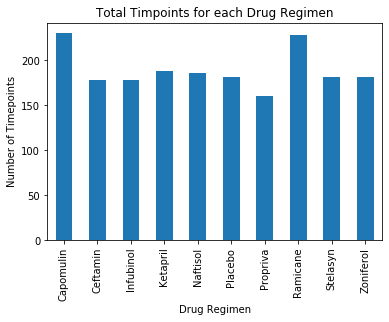

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group Timepoint and count values, use this df to plot the bar chart
# Code adapted from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
grouped["Timepoint"].count().plot(kind="bar")

# Label the title and y-axis
plt.title("Total Timpoints for each Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

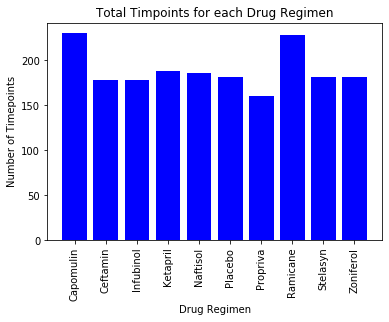

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Using the agg_stats DataFrame from the previous section, reset index and isolate the info in "Drug Regimen"
# (names & counts)
stats = agg_stats.reset_index()
x_axis = list(stats["Drug Regimen"])
timepoints = list(grouped["Drug Regimen"].count())

# Plot the bar chart
plt.bar(x_axis, timepoints, color='b', align="center")

# Title & label the axes
plt.title("Total Timpoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Rotate tick marks so the labels are readable
plt.xticks(rotation = 90)
plt.show()

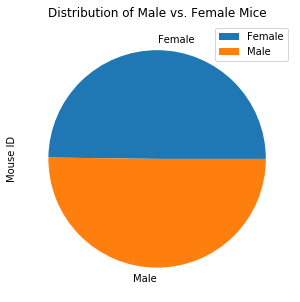

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create new DataFrame to clear out all extra rows for each mouse so the new DataFrame only reflects the individual
# mouse data
ind_mouse = cleaned_study.drop_duplicates(subset = ["Mouse ID"])

# Create a pie chart by grouping the individual mouse data by sex and counting the number of each
# Code adapted from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
ind_mouse.groupby(["Sex"]).count().plot(kind="pie", y="Mouse ID", figsize=(5, 5))
plt.title("Distribution of Male vs. Female Mice")
plt.show()

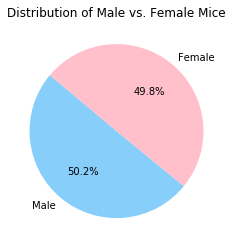

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set colors, sizes and labels to use in the pie plot coding
colors = ["lightskyblue", "pink"]
sizes = list(ind_mouse["Sex"].value_counts())
gender = ind_mouse["Sex"].value_counts().reset_index()
labels = gender["index"].unique()

# Create a pie chart and title it
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
cleaned_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(cleaned_study.groupby("Mouse ID")["Timepoint"].max().sort_values())\
.rename(columns = {"Timepoint":"Max Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(cleaned_study, max_tp, how="left", on="Mouse ID")
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,45
1888,z969,Naftisol,Male,9,30,30,65.841013,3,45
1889,z969,Naftisol,Male,9,30,35,69.176246,4,45
1890,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [18]:
# Put treatments into a list for a for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting), in addition create empty lists for each quartile,
# the quartile range and outlier bounds.

# Create tumor_vol, all quartile, individual quartiles, inner quartile range, and bounds for outliers
# lists using for loop. Use an index set at 0 and add one at the end of the loop to reference specific values.
# Print results in loop so it shows the final results for each drug.
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []
all_q = []
index = 0
lower_q = []
upper_q = []
median = []
iqr = []
lower_bound = []
upper_bound = []
new = merged.loc[merged["Timepoint"] == merged["Max Timepoint"], :] ##filter out results to only include max timepoint
for drug in drugs:
    vari = new.loc[merged["Drug Regimen"] == drug]["Tumor Volume (mm3)"] ##vari is set so tumor_vol can remain series
    vari2 = new.loc[merged["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    quartiles = vari2.quantile([0.25,0.5,0.75])
    all_q.append(quartiles)
    tumor_vol.append(vari)
    lower = all_q[index]["Tumor Volume (mm3)"][0.25]
    upper = all_q[index]["Tumor Volume (mm3)"][0.75]
    iqr.append(upper-lower)
    lower_q.append(all_q[index]["Tumor Volume (mm3)"][0.25])
    upper_q.append(all_q[index]["Tumor Volume (mm3)"][0.75])
    median.append(all_q[index]["Tumor Volume (mm3)"][0.5])
    lower_bound.append(lower_q[index] - (1.5*iqr[index]))
    upper_bound.append(upper_q[index] + (1.5*iqr[index]))
    print(f'''
    {drug}:
    The lower quartile is: {round(lower_q[index],2)}
    The upper quartile is: {round(upper_q[index],2)}
    The interquartile range is: {round(iqr[index],2)}
    The the median is: {round(median[index],2)}
    Values below {round(lower_bound[index],2)} could be outliers.
    Values above {round(upper_bound[index],2)} could be outliers.
    _____________________________________________________''')
    index = index + 1


    Capomulin:
    The lower quartile is: 32.38
    The upper quartile is: 40.16
    The interquartile range is: 7.78
    The the median is: 38.13
    Values below 20.7 could be outliers.
    Values above 51.83 could be outliers.
    _____________________________________________________

    Ramicane:
    The lower quartile is: 31.56
    The upper quartile is: 40.66
    The interquartile range is: 9.1
    The the median is: 36.56
    Values below 17.91 could be outliers.
    Values above 54.31 could be outliers.
    _____________________________________________________

    Infubinol:
    The lower quartile is: 54.05
    The upper quartile is: 65.53
    The interquartile range is: 11.48
    The the median is: 60.17
    Values below 36.83 could be outliers.
    Values above 82.74 could be outliers.
    _____________________________________________________

    Ceftamin:
    The lower quartile is: 48.72
    The upper quartile is: 64.3
    The interquartile range is: 15.58
    The the me

In [19]:
# Determine outliers using upper and lower bounds
# Reviewing each tumor_vol list by drug, look at max and min values for each drug to see if they fall within range, 
# be sure to check for more than one outlier at each extreme.

# tumor_vol[0].sort_values()
# tumor_vol[1].sort_values()
# tumor_vol[2].sort_values()
# tumor_vol[3].sort_values()
print(f"{drugs[2]} has an outlier equal to {round(tumor_vol[2].min(),2)}.")

Infubinol has an outlier equal to 36.32.


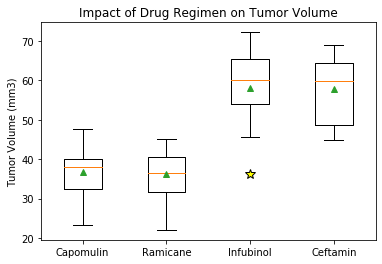

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Code for outlier marker adapted from JohanC at 
# https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot

fig1, ax1 = plt.subplots()
ax1.set_title('Impact of Drug Regimen on Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=drugs, showmeans=True, \
            flierprops={'marker': '*', 'markersize': 10, 'markerfacecolor': 'yellow'})
plt.show()

## Line and Scatter Plots

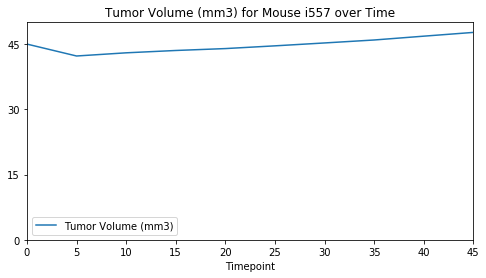

In [21]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
cap_mice = cleaned_study.loc[cleaned_study["Drug Regimen"] == "Capomulin", :]
cap_mouse = cap_mice.loc[cap_mice["Mouse ID"] == "i557", ["Mouse ID", "Drug Regimen",\
                                                          "Timepoint", "Tumor Volume (mm3)"]]
cap_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)", title="Tumor Volume (mm3) for Mouse i557 over Time",\
                   ylim = [0, max(cap_mouse["Tumor Volume (mm3)"])+2.31], yticks = [0, 15, 30, 45], xlim = \
                    [min(cap_mouse["Timepoint"]),max(cap_mouse["Timepoint"])], figsize=(8,4))
plt.show()

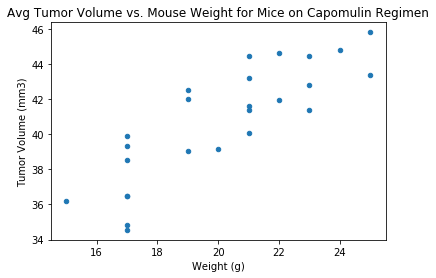

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_grouped = cap_mice.groupby(["Mouse ID"])
avg_vol = cap_grouped.mean()
avg_vol.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", \
                     title = "Avg Tumor Volume vs. Mouse Weight for Mice on Capomulin Regimen")
plt.show()

## Correlation and Regression

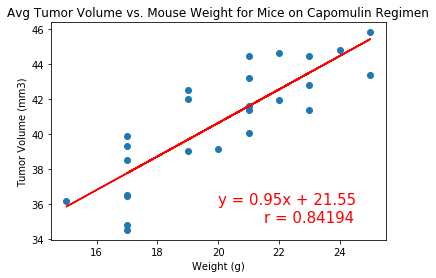

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol["Weight (g)"]
y_values = avg_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f"r = {round(rvalue,5)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.annotate(r,(21.5, 35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight for Mice on Capomulin Regimen")
plt.show()